<a href="https://colab.research.google.com/github/kaishra/AFAME-PROJECT/blob/main/HR_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [211]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


In [212]:
#loading the dataset
data = pd.read_csv('/content/HR Data (1).csv')
pd.set_option('display.max_columns',None)
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [213]:
#Attribute-Attrition(likelihood of employees leaving the company)
#Target col/var-Attrition(YES/NO)
#check for null values and describe the shape of the dataset


data.dropna(axis=0,inplace=True)
data.isnull().sum()
data.shape

# Check for NaN values in the entire DataFrame
print(data.isna().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

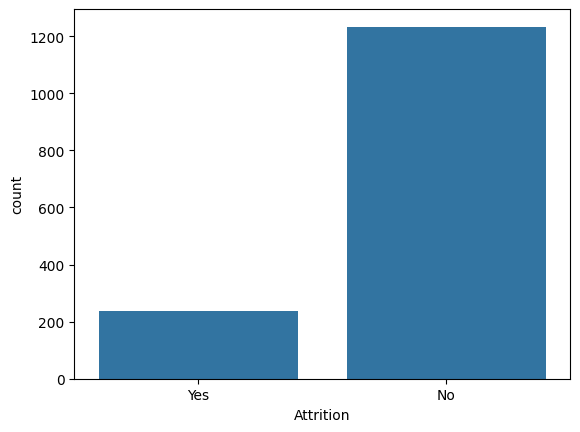

In [215]:
sns.countplot(x=data.Attrition)
plt.show()


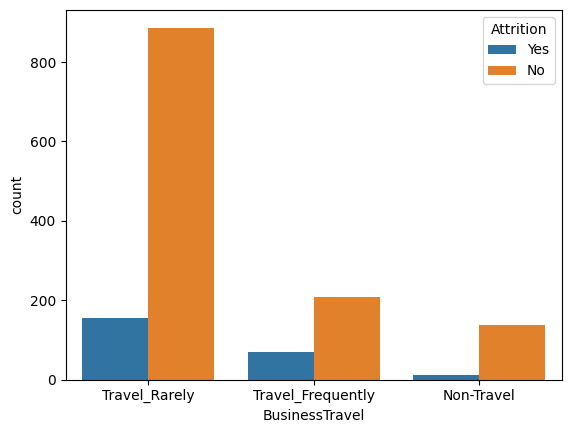

In [217]:
sns.countplot(hue=data.Attrition,x=data.BusinessTravel)
plt.show()





* Travel_Frequently and Travel_Rarely BusinessTravel are more likely to influence Attrition rates.

*  Non-Travel have least count and least attrition.





In [218]:
# Creating a crosstab to see the relationship between BusinessTravel and Attrition
crosstab = pd.crosstab(data['BusinessTravel'], data['Attrition'], normalize='index') * 100
print(crosstab)


Attrition                 No        Yes
BusinessTravel                         
Non-Travel         92.000000   8.000000
Travel_Frequently  75.090253  24.909747
Travel_Rarely      85.043145  14.956855


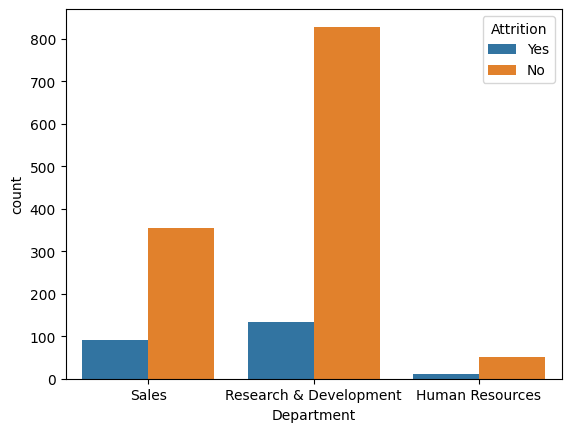

In [219]:
sns.countplot(hue=data.Attrition,x=data.Department)
plt.show()



*   "Research and Development" show more Attrition as compared to other departments.
*   "HR" department with least Attrition.



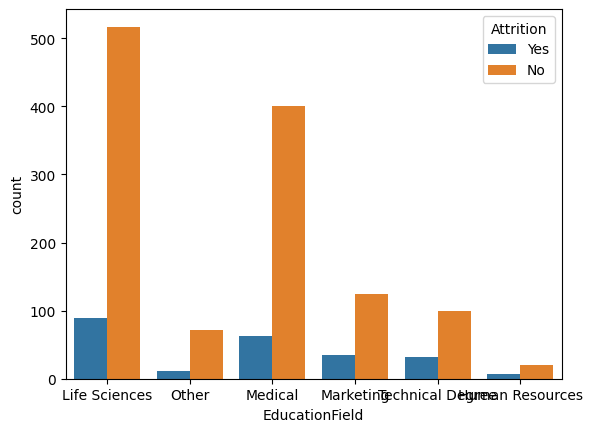

In [220]:
sns.countplot(hue=data.Attrition,x=data.EducationField)

plt.show()



1.   "Life Science" education field affects the Attrition as it shows more employee turnover.
2.   "HR" shows least Attrition.



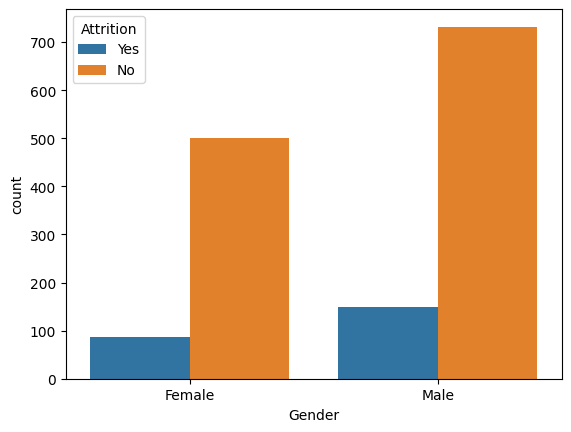

In [221]:
sns.countplot(hue=data.Attrition,x=data.Gender)
plt.show()



*   Male shows more Attrition than female




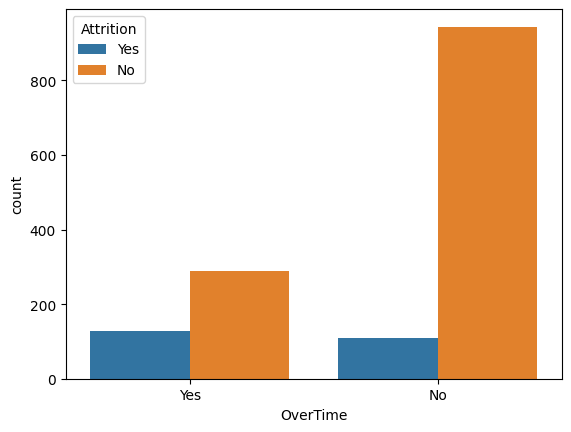

In [222]:
sns.countplot(hue=data.Attrition,x=data.OverTime)
plt.show()



*   Mild difference between Employees who do Overtime and those who donot.

*   Less number of employees who do OverTime.







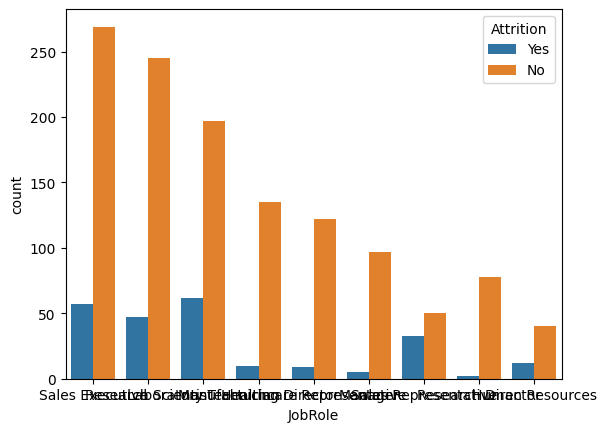

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [223]:
sns.countplot(hue=data.Attrition,x=data.JobRole)
#plt.figure(figsize=(12, 6))  # Adjust figsize as needed
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
#plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()
data.isna().sum()



*   Less number of "Research Directors" leave the company.
*   "Laboratory Technician" show more Attrition as compared to other Roles.



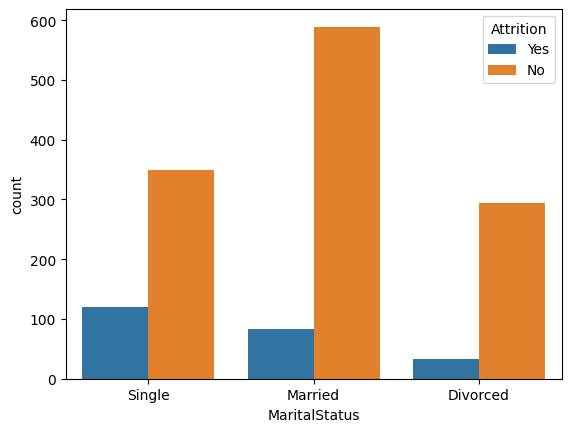

In [224]:
sns.countplot(hue=data.Attrition,x=data.MaritalStatus)
plt.show()

In [225]:
# Create a crosstab to see the relationship between MaritalStatus and Attrition
crosstab = pd.crosstab(data['MaritalStatus'], data['Attrition'], normalize='index') * 100
print(crosstab)

Attrition             No        Yes
MaritalStatus                      
Divorced       89.908257  10.091743
Married        87.518574  12.481426
Single         74.468085  25.531915




*   "Singles" have the highest Attrition rate, this indicates that they are more prone to leave as compared to the other groups.



In [226]:
#Handling categorical variables

data.Attrition=data.Attrition.map({'Yes':1,'No':0})
data.BusinessTravel=data.BusinessTravel.map({'Travel_Frequently':1,'Travel_Rarely':2,'Non-Travel':0})
data.Department=data.Department.map({'Research & Development':2,'Sales':1,'Human Resources':0})
data.EducationField=data.EducationField.map({'Life Sciences':5,'Medical':4,'Marketing':3,'Technical Degree':2,'Other':1,'Human Resources':0})
data.Gender=pd.get_dummies(data.Gender,drop_first=True)
data.JobRole=data.JobRole.map({'Laboratory Technician':8,'Sales Executive':7,'Research Scientist':6,'Sales Representative':5,'Human Resources':4,'Manufacturing Director':3,'Healthcare Representative':2,'Manager':1,'Research Director':0})
data.MaritalStatus=data.MaritalStatus.map({'Single':2,'Married':1,'Divorced':0})
data.OverTime=data.OverTime.map({'Yes':1,'No':0})
data.info()
data.isna().sum()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   int64 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int64 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   int64 
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   bool  
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.610884,9.192517,2.912925,3.883673,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,5.121088,2.728571,1.097279,6502.931293,14313.103401,2.693197,0.282993,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.568893,8.106864,1.024165,1.289616,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,2.522661,1.102846,0.730121,4707.956783,7117.786044,2.498009,0.450606,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1009.000000,2094.000000,0.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,3.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2911.000000,8047.000000,1.000000,0.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,2.000000,7.000000,3.000000,4.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,6.000000,3.000000,1.000000,4919.000000,14235.500000,2.000000,0.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,5.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,7.000000,4.000000,2.000000,8379.000000,20461.500000,4.000000,1.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,8.000000,4.000000,2.000000,19999.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [227]:
#Feature Selection
#drop unique cols that donot provide much information
data.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1,inplace=True)

In [228]:
#Model Creation
x=data.drop("Attrition",axis=1)
y=data["Attrition"]



In [229]:
#Model Creation
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.25)
data.Attrition.value_counts()


Attrition
0    1233
1     237
Name: count, dtype: int64

In [230]:
# Model building and Prediction using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Evaluation
print(classification_report(y_test, y_pred))

Accuracy: 0.7961956521739131
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       320
           1       0.27      0.33      0.30        48

    accuracy                           0.80       368
   macro avg       0.58      0.60      0.59       368
weighted avg       0.81      0.80      0.80       368

